# Digital Image Processing: Intro & Applications

Demo by Jason Byrne
Sept. 2017

Sources include: 

    "Digital Image Processing" - Gonzalez & Woods
    http://scikit-image.org/
    https://matplotlib.org/
    http://www.scipy-lectures.org/
    

In [1]:
from skimage import data, io, filters, util

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.size'] = 10

import numpy as np


#### A digital image is a numeric representation (a matrix) of an image f(x,y) that has been discretized both in spatial coordinates and brightness.

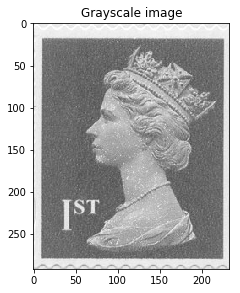

In [2]:
img = io.imread('stamp.jpg', flatten=1)
io.imshow(img)
plt.title('Grayscale image')
io.show()

### Image Enhancement

The probability of occurence of a pixel with intensity i is:

p_x(i) = n_i/n ...0<i<L

The cumulative distribution function is:

cd f_x(i) = Sum_j(p_x(j))  

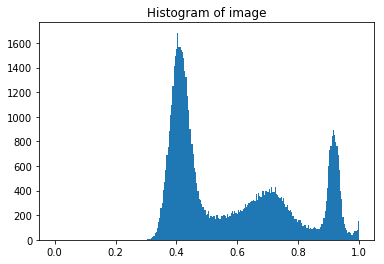

In [3]:
plt.hist(img.ravel(), bins=256, range=(0.0, 1.0))
plt.title('Histogram of image')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


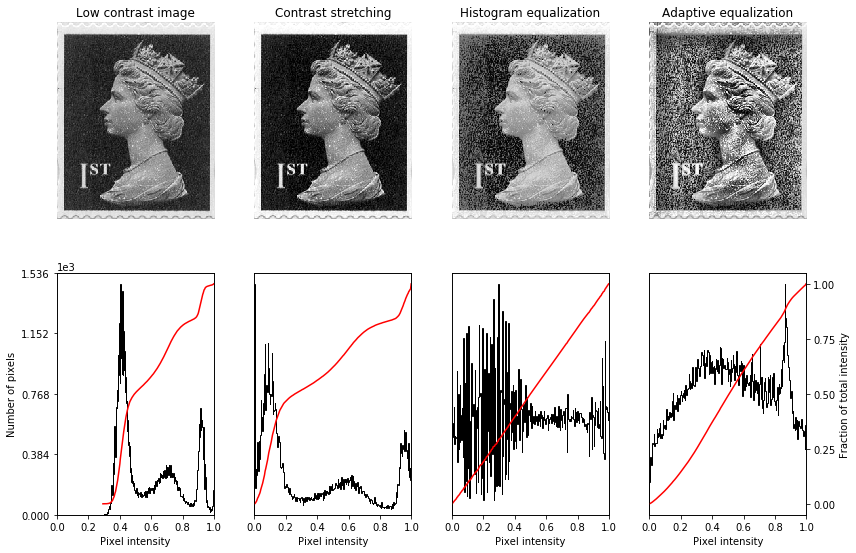

In [4]:
from skimage import img_as_float, exposure

matplotlib.rcParams['font.size'] = 10


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    ax_img.set_adjustable('box-forced')

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
#img = data.moon()
#img = io.imread('stamp.jpg', flatten=1)

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(12, 8))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

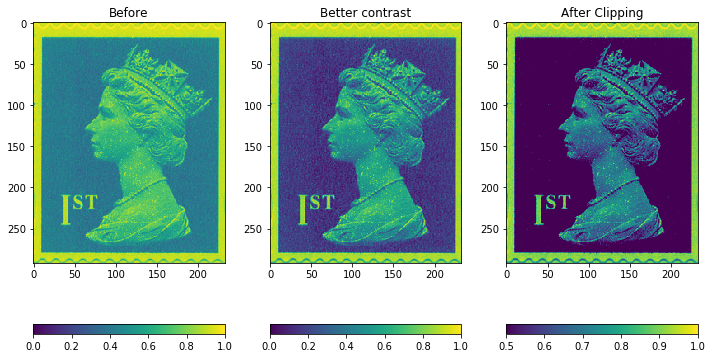

In [5]:
fig = plt.figure(figsize=(10,6))
a=fig.add_subplot(1,3,1)
imgplot = plt.imshow(img)
imgplot.set_clim(0.0,1.0)
a.set_title('Before')
plt.colorbar(orientation ='horizontal')

better_contrast = exposure.rescale_intensity(img)
a=fig.add_subplot(1,3,2)
a.set_title('Better contrast')
plt.imshow(better_contrast)
plt.colorbar(orientation ='horizontal')


a=fig.add_subplot(1,3,3)
imgplot = plt.imshow(img)
imgplot.set_clim(0.5,1.0)
a.set_title('After Clipping')
plt.colorbar(orientation='horizontal')

fig.tight_layout()
plt.show()

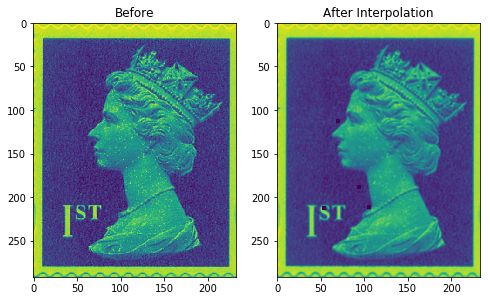

In [6]:
fig = plt.figure(figsize=(8,6))
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(img)
imgplot.set_clim(0.3,1.0)
a.set_title('Before')
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(img, interpolation="bicubic")
imgplot.set_clim(0.3,1.0)
a.set_title('After Interpolation')
plt.show()

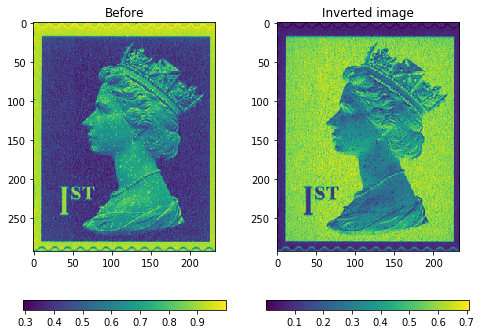

In [7]:
inverted_img = util.invert(img)

fig = plt.figure(figsize=(8,6))
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(img)
a.set_title('Before')
plt.colorbar(orientation ='horizontal')
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(inverted_img)
a.set_title('Inverted image')
plt.colorbar(orientation='horizontal')
plt.show()

### Image Segmentation

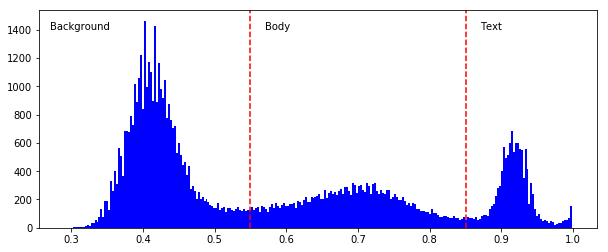

In [8]:
plt.figure(figsize=(10,4))
plt.hist(img.ravel(), bins=256, color='b')
plt.axvline(0.55, linestyle='--', color='r')
plt.axvline(0.85, linestyle='--', color='r')
plt.text(0.27,1400,'Background')
plt.text(0.57,1400,'Body')
plt.text(0.87,1400,'Text')
plt.show()

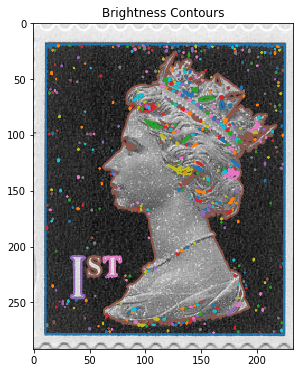

In [9]:
from skimage import measure

contours = measure.find_contours(img, 0.5)
# Display the image and plot all contours found
fig, ax = plt.subplots(figsize=(8,6))
ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    
plt.title('Brightness Contours')
plt.show()

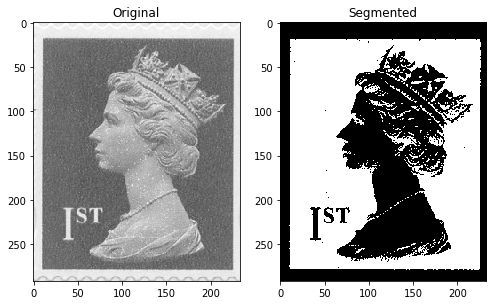

In [10]:
fig = plt.figure(figsize=(7,6))
a=fig.add_subplot(1,2,1)
io.imshow(img)
a.set_title('Original')

img_thresh = (img>0.25) & (img<0.55)
img_thresh[img_thresh>0.5]=1
img_thresh[img_thresh<=0.5]=0
img_thresh=img_thresh.astype('bool')

a=fig.add_subplot(1,2,2)
a.set_title('Segmented')
io.imshow(img_thresh)
io.show()

### Edge Detection

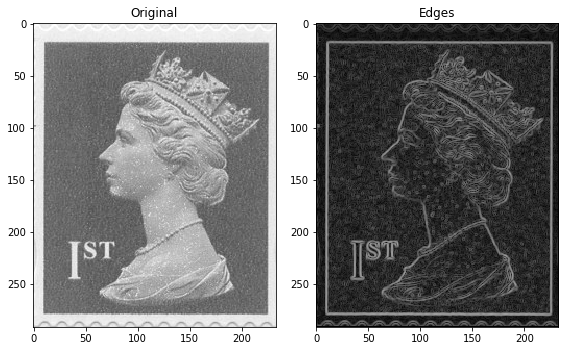

In [11]:
edges = filters.sobel(img)
#edges = filters.roberts(img)
#edges = filters.scharr(img)
#edges = filters.prewitt(img)

fig = plt.figure(figsize=(8,6))
a=fig.add_subplot(1,2,1)
io.imshow(img)
a.set_title('Original')
a=fig.add_subplot(1,2,2)
a.set_title('Edges')
io.imshow(edges**0.5)
io.show()

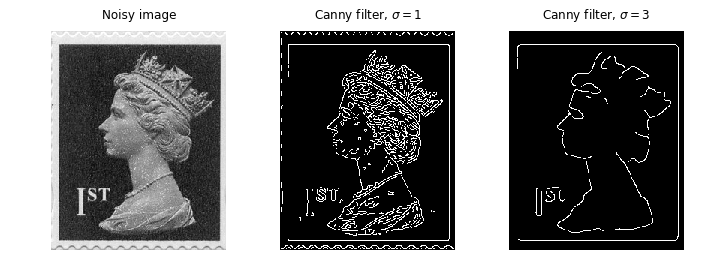

In [12]:
"""
===================
Canny edge detector
===================

The Canny filter is a multi-stage edge detector. It uses a filter based on the
derivative of a Gaussian in order to compute the intensity of the gradients.The
Gaussian reduces the effect of noise present in the image. Then, potential
edges are thinned down to 1-pixel curves by removing non-maximum pixels of the
gradient magnitude. Finally, edge pixels are kept or removed using hysteresis
thresholding on the gradient magnitude.

The Canny has three adjustable parameters: the width of the Gaussian (the
noisier the image, the greater the width), and the low and high threshold for
the hysteresis thresholding.

"""

from skimage import feature

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(img, sigma=1, low_threshold=0.1, high_threshold=0.2)
edges2 = feature.canny(img, sigma=3, low_threshold=0.1, high_threshold=0.2)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 4),
                                    sharex=True, sharey=True)

ax1.imshow(img, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Noisy image')

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$')

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$')

fig.tight_layout()
plt.show()

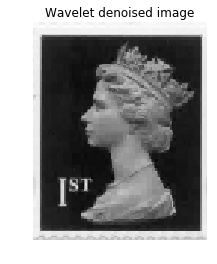

In [13]:
from skimage import restoration

denoised_img = restoration.denoise_wavelet(img, sigma=0.1)

plt.imshow(denoised_img, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Wavelet denoised image')
plt.show()

### Morphological Processing

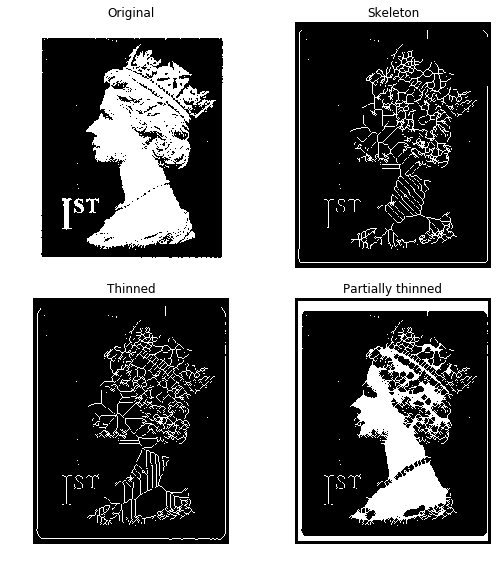

In [16]:
"""
===========
Skeletonize
===========

Skeletonization reduces binary objects to 1 pixel wide representations. This
can be useful for feature extraction, and/or representing an object's topology.

``skeletonize`` works by making successive passes of the image. On each pass,
border pixels are identified and removed on the condition that they do not
break the connectivity of the corresponding object.
"""



######################################################################
# **Morphological thinning**
#
# Morphological thinning, implemented in the `thin` function, works on the
# same principle as `skeletonize`: remove pixels from the borders at each
# iteration until none can be removed without altering the connectivity. The
# different rules of removal can speed up skeletonization and result in
# different final skeletons.
#
# The `thin` function also takes an optional `max_iter` keyword argument to
# limit the number of thinning iterations, and thus produce a relatively
# thicker skeleton.

from skimage.morphology import skeletonize, thin

image = util.invert(img_thresh)
skeleton = skeletonize(image)
thinned = thin(image)
thinned_partial = thin(image, max_iter=3)

fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(skeleton, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Skeleton')
ax[1].axis('off')

ax[2].imshow(thinned, cmap=plt.cm.gray, interpolation='nearest')
ax[2].set_title('Thinned')
ax[2].axis('off')

ax[3].imshow(thinned_partial, cmap=plt.cm.gray, interpolation='nearest')
ax[3].set_title('Partially thinned')
ax[3].axis('off')

fig.tight_layout()
plt.show()


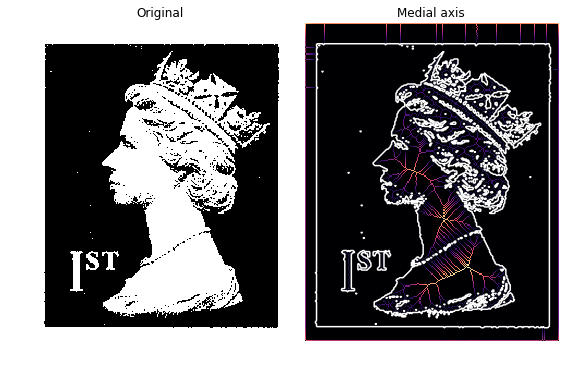

In [15]:
######################################################################
# **Medial axis skeletonization**
#
# The medial axis of an object is the set of all points having more than one
# closest point on the object's boundary. It is often called the *topological
# skeleton*, because it is a 1-pixel wide skeleton of the object, with the same
# connectivity as the original object.
#
# Here, we use the medial axis transform to compute the width of the foreground
# objects. As the function ``medial_axis`` returns the distance transform in
# addition to the medial axis (with the keyword argument ``return_distance=True``),
# it is possible to compute the distance to the background for all points of
# the medial axis with this function. This gives an estimate of the local width
# of the objects.
#
# For a skeleton with fewer branches, ``skeletonize`` or ``skeletonize_3d``
# should be preferred.

from skimage.morphology import medial_axis

# Generate the data
data = util.invert(img_thresh)

# Compute the medial axis (skeleton) and the distance transform
skel, distance = medial_axis(data, return_distance=True)

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel

from skimage.util.colormap import magma

fig, axes = plt.subplots(1, 2, figsize=(8, 8), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

ax[0].imshow(data, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(dist_on_skel, cmap=magma, interpolation='nearest')
ax[1].contour(data, [0.5], colors='w')
ax[1].set_title('Medial axis')
ax[1].axis('off')

fig.tight_layout()
plt.show()
